In [591]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [613]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# dateparse('1962-01')
data = pd.read_csv('Data_Venda_mes.csv', delimiter = ';', parse_dates=['DataVenda'], index_col='DataVenda',date_parser=dateparse)
data.head()

,Codigo
DataVenda,
2017-01-01,6
2017-02-01,12
2017-03-01,23
2017-04-01,11
2017-05-01,7


In [606]:
data.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='DataVenda', freq=None)

In [614]:
type(data)

pandas.core.frame.DataFrame

In [607]:
#convert to time series:
ts = data['Codigo']
ts.head(10)

DataVenda
2017-01-01     6
2017-02-01    12
2017-03-01    23
2017-04-01    11
2017-05-01     7
2017-06-01    11
2017-07-01    40
2017-08-01    59
2017-09-01    56
2017-10-01    29
Name: Codigo, dtype: int64

In [64]:
#1. Specific the index as a string constant:
ts['2017-01-01']

6

In [65]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime

In [66]:
#1. Specify the entire range:
ts['2017-01-01':'2020-05-01']

DataVenda
2017-01-01      6
2017-02-01     12
2017-03-01     23
2017-04-01     11
2017-05-01      7
2017-06-01     11
2017-07-01     40
2017-08-01     59
2017-09-01     56
2017-10-01     29
2017-11-01     40
2017-12-01     79
2018-01-01    105
2018-02-01    183
2018-03-01    170
2018-04-01    146
2018-05-01    116
2018-06-01    221
2018-07-01    313
2018-08-01    272
2018-09-01    297
2018-10-01    401
2018-11-01    317
2018-12-01    366
2019-01-01    483
2019-02-01    516
2019-03-01    555
2019-04-01    600
2019-05-01    467
2019-06-01    475
2019-07-01    511
2019-08-01    553
2019-09-01    476
2019-10-01    365
2019-11-01    403
2019-12-01    497
2020-01-01    465
Name: Codigo, dtype: int64

In [67]:
#All rows of 1962:
ts['2018']

DataVenda
2018-01-01    105
2018-02-01    183
2018-03-01    170
2018-04-01    146
2018-05-01    116
2018-06-01    221
2018-07-01    313
2018-08-01    272
2018-09-01    297
2018-10-01    401
2018-11-01    317
2018-12-01    366
Name: Codigo, dtype: int64

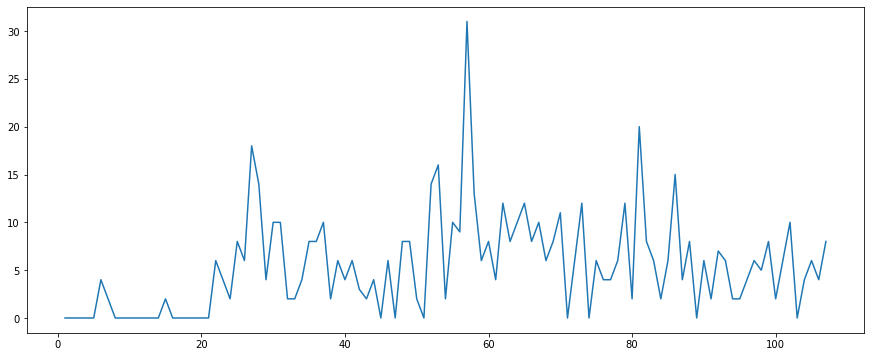

In [748]:
plt.plot(ts)

In [703]:
data = pd.read_csv('4-VendasTelepWeek-Rev3.csv', delimiter = ',')
df = data.loc[data['Codigo'] == 2]
df1 = df.T.reset_index()
df1.columns = ["Semana","Quantidade"]
ts = df1[1:][1:]

ts = ts['Quantidade'].values.astype(int)
ts = pd.Series(ts)


type(ts)

pandas.core.series.Series

In [708]:
ts.dropna(inplace = True)

In [715]:
ts.drop(0, inplace=True, axis=0)

In [705]:
#Function for testing stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(52).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(52).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

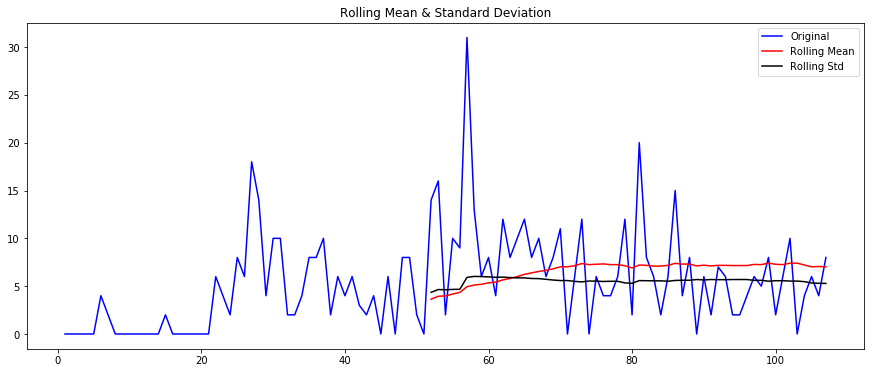

Results of Dickey-Fuller Test:
Test Statistic                  -2.542463
p-value                          0.105481
#Lags Used                       4.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


In [716]:
test_stationarity(ts)

In [593]:
#Making TS Stationary
#Estimating & Eliminating Trend

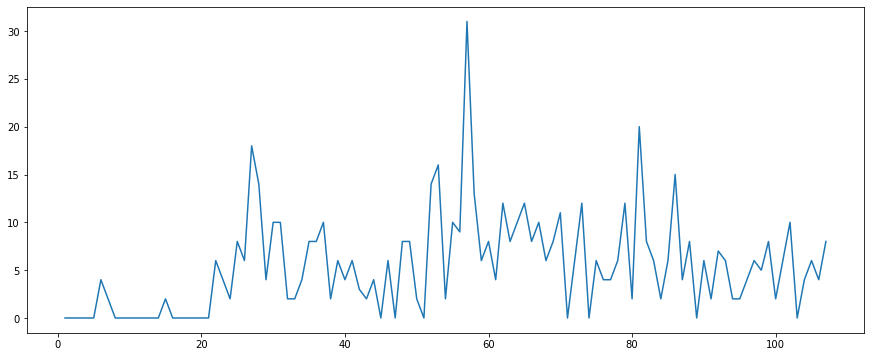

In [722]:
#ts_log = np.log(ts)
ts_log = ts
plt.plot(ts_log)

In [718]:
ts_log

1          -inf
2          -inf
3          -inf
4          -inf
5          -inf
         ...   
103        -inf
104    1.386294
105    1.791759
106    1.386294
107    2.079442
Length: 107, dtype: float64

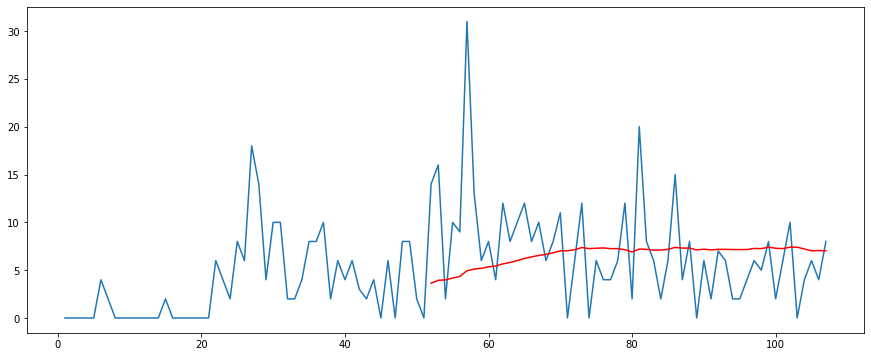

In [723]:
moving_avg = ts_log.rolling(52).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [726]:
ts_log.rolling(52).mean()

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
103    7.403846
104    7.211538
105    7.019231
106    7.057692
107    7.019231
Length: 107, dtype: float64

In [727]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(52)

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47          NaN
48          NaN
49          NaN
50          NaN
51          NaN
52    10.365385
dtype: float64

In [728]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

52    10.365385
53    12.057692
54    -1.980769
55     5.826923
56     4.653846
dtype: float64

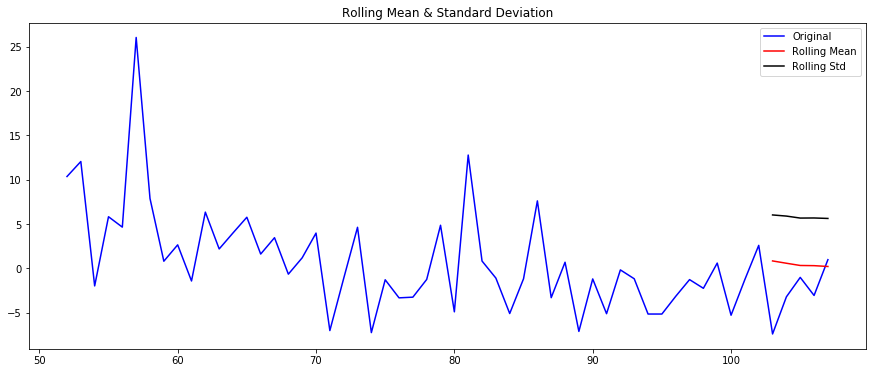

Results of Dickey-Fuller Test:
Test Statistic                -5.970562e+00
p-value                        1.940790e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


In [729]:
test_stationarity(ts_log_moving_avg_diff)

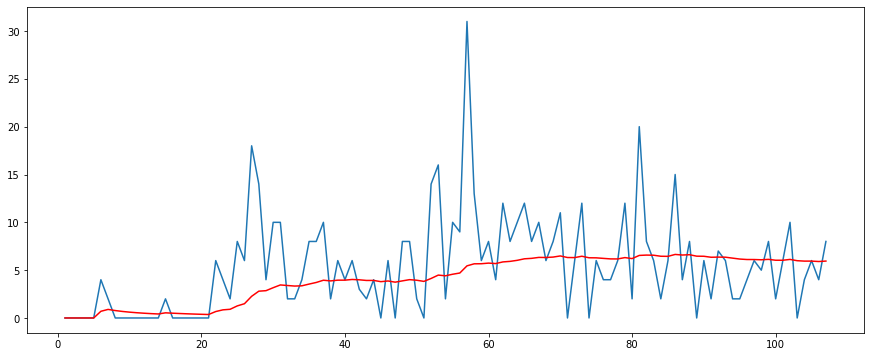

In [730]:
#Exponentially Weighted Moving Average
expwighted_avg = ts_log.ewm(52).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

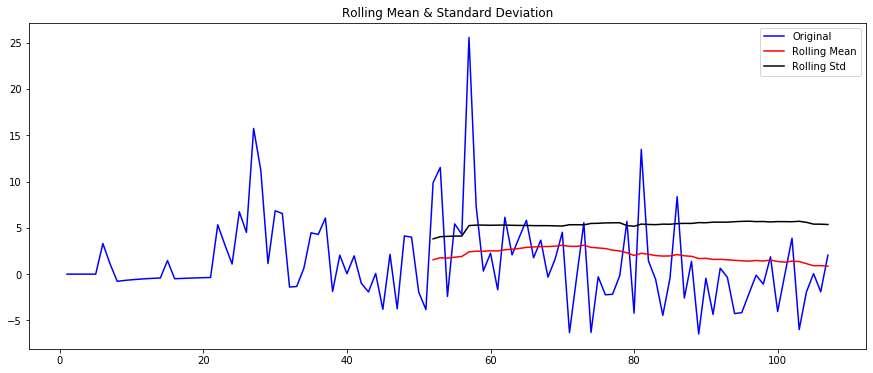

Results of Dickey-Fuller Test:
Test Statistic                -8.346690e+00
p-value                        3.071849e-13
#Lags Used                     0.000000e+00
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


In [731]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

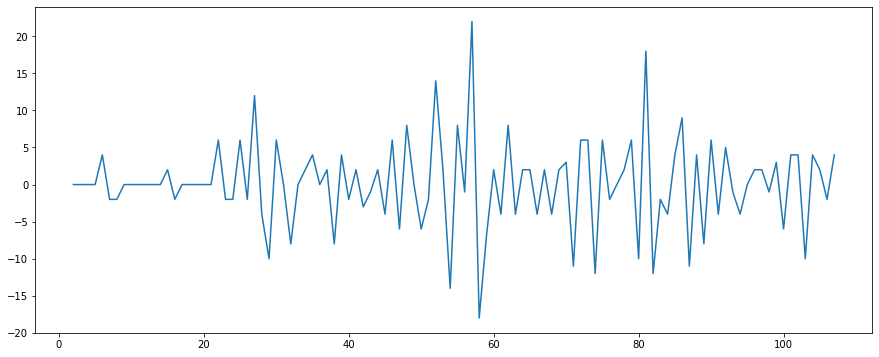

In [732]:
#Eliminating Trend and Seasonality
#Differencing:

#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

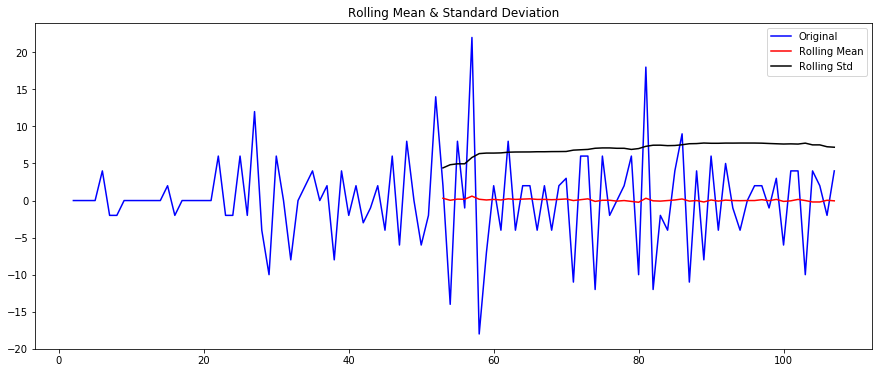

Results of Dickey-Fuller Test:
Test Statistic                -9.406700e+00
p-value                        5.984744e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64


In [733]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [734]:
#Decomposition:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [735]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

NameError: name 'residual' is not defined

In [ ]:
#Final Forecasting

In [736]:
from statsmodels.tsa.arima_model import ARIMA

In [737]:
ts_log_diff.dropna(inplace=True)

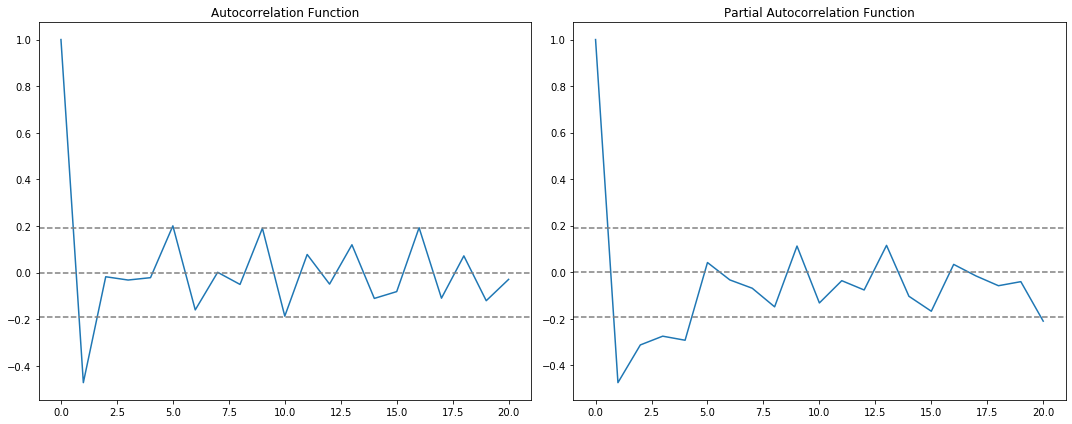

In [738]:
#CF & PACF Plots

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Text(0.5, 1.0, 'RSS: 2725.0998')

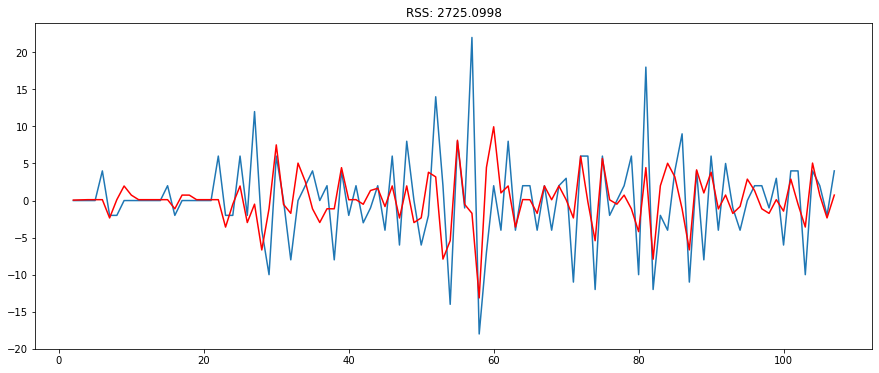

In [739]:
#AR Model:

#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Text(0.5, 1.0, 'RSS: 2371.8208')

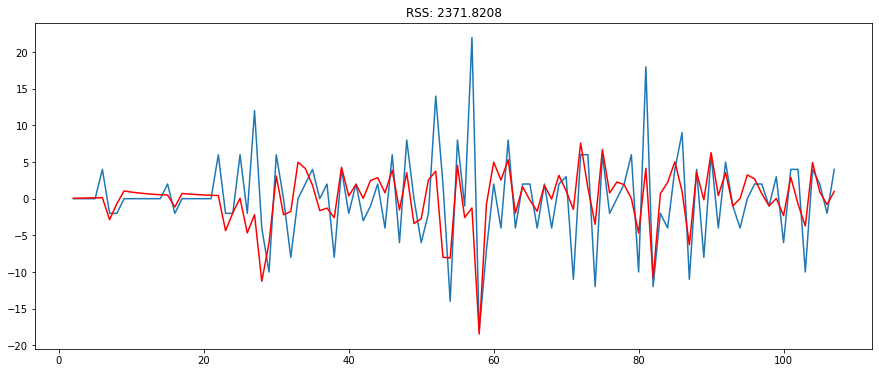

In [740]:
#MA Model

model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Text(0.5, 1.0, 'RSS: 2334.0295')

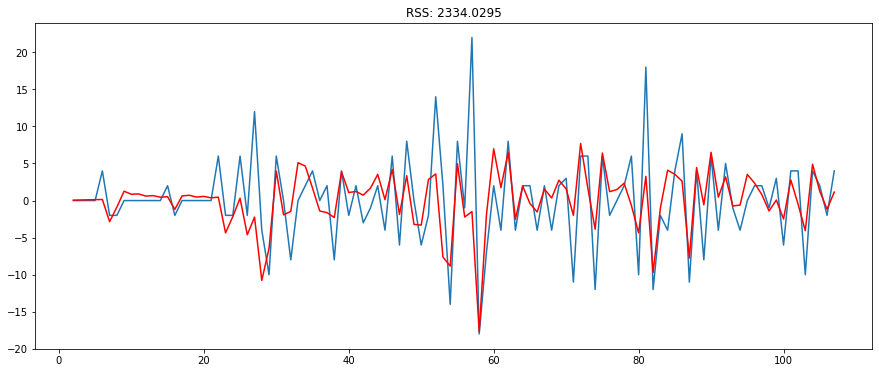

In [742]:
#ARIMA Model:

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
#Convert to original scale:

In [743]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

2    0.050156
3    0.073236
4    0.100210
5    0.118398
6    0.142801
dtype: float64


In [744]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2    0.050156
3    0.123391
4    0.223601
5    0.342000
6    0.484801
dtype: float64


In [745]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

<ipython-input-745-a0e7889edee6>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)


KeyError: 0

NameError: name 'predictions_ARIMA_log' is not defined

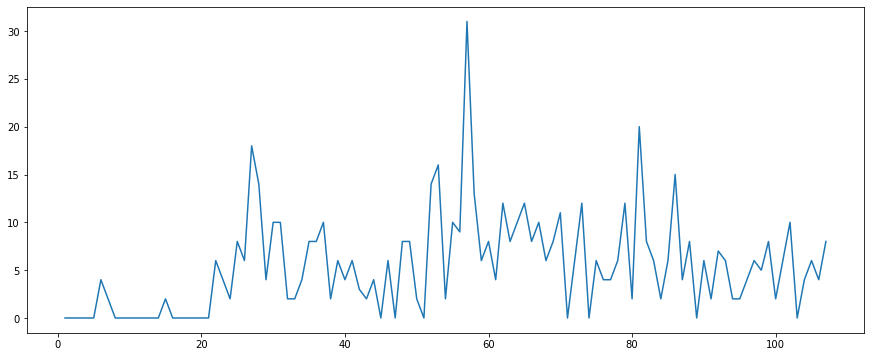

In [746]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

In [1150]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

NameError: name 'predictions_ARIMA_log' is not defined

In [1151]:
#Lstm

In [1152]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1153]:
data = pd.read_csv('4-VendasTelepWeek-Rev3.csv', delimiter = ',')
data.head()

,Codigo,0,1,2,3,4,5,6,7,8,...,99,100,101,102,103,104,105,106,107,108
0,1,0,0,0,0,0,2,2,4,2,...,9,10,8,8,10,0,6,10,6,2
1,2,0,0,0,0,0,0,0,4,2,...,5,8,2,6,10,0,4,6,4,8
2,3,0,0,0,0,0,0,0,0,0,...,5,0,0,4,4,0,0,10,6,2
3,4,0,0,0,0,0,0,0,0,0,...,2,0,0,0,4,0,0,4,6,0
4,5,0,0,0,0,0,0,5,0,2,...,13,25,30,6,0,0,0,17,10,0


In [1154]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [1155]:
data.head(10)

,Codigo,0,1,2,3,4,5,6,7,8,...,99,100,101,102,103,104,105,106,107,108
0,1,0,0,0,0,0,2,2,4,2,...,9,10,8,8,10,0,6,10,6,2
1,2,0,0,0,0,0,0,0,4,2,...,5,8,2,6,10,0,4,6,4,8
2,3,0,0,0,0,0,0,0,0,0,...,5,0,0,4,4,0,0,10,6,2
3,4,0,0,0,0,0,0,0,0,0,...,2,0,0,0,4,0,0,4,6,0
4,5,0,0,0,0,0,0,5,0,2,...,13,25,30,6,0,0,0,17,10,0
5,6,0,0,0,0,0,0,0,0,0,...,1,4,1,1,0,0,3,2,0,0
6,8,0,0,0,1,3,6,0,0,0,...,10,10,20,10,0,0,30,7,0,0
7,9,0,0,0,0,0,0,0,0,0,...,13,0,6,7,3,0,0,3,5,1
8,7,0,4,0,0,4,6,2,3,0,...,0,5,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,2,1,...,0,0,0,3,1,1,0,3,1,1


In [1199]:
df = data.loc[data['Codigo'] == 2]
df1 = df.T.reset_index()
df1.columns = ["Semana","Quantidade"]
df1 = df1[1:][1:]
df1.head(10)

,Semana,Quantidade
2,1,0
3,2,0
4,3,0
5,4,0
6,5,0
7,6,0
8,7,4
9,8,2
10,9,0
11,10,0


In [1200]:
df1.shape

(108, 2)

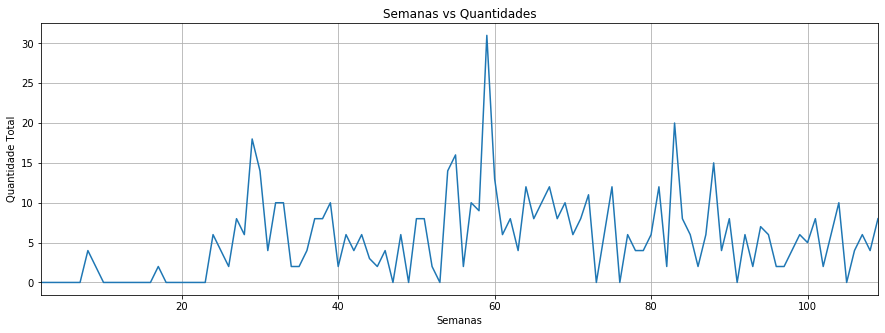

In [1201]:
plt.title('Semanas vs Quantidades')
plt.ylabel('Quantidade Total')
plt.xlabel('Semanas')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df1['Quantidade'])

In [1227]:
df1.shape

(108, 2)

In [1228]:
all_data = df1['Quantidade'].values.astype(float)

In [1229]:
test_data_size = 52

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [1230]:
#print(len(train_data))
#print(len(test_data))

In [1231]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [1232]:
#print(train_data_normalized[:5])
#print(train_data_normalized[-5:])

In [1233]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [1234]:
train_window = 52

In [1235]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [1236]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [1237]:
#train_inout_seq[:5]

In [1249]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [1250]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [1251]:
#print(model)

In [1252]:
epochs = 50

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.01465546
epoch:  26 loss: 0.00912251
epoch:  49 loss: 0.0417091064


In [1253]:
fut_pred = 52

test_inputs = train_data_normalized[-train_window:].tolist()
#print(test_inputs)

In [1254]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [1255]:
#test_inputs[fut_pred:]

In [1256]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
#print(actual_predictions)

In [1257]:
x = np.arange(58, 110, 1)
#print(x)

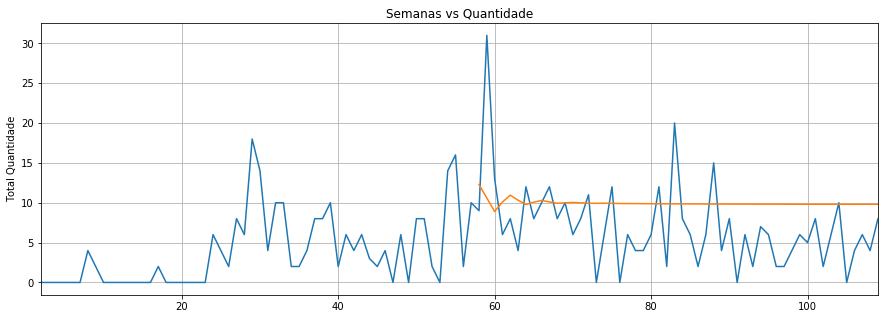

In [1258]:
plt.title('Semanas vs Quantidade')
plt.ylabel('Total Quantidade')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df1['Quantidade'])
plt.plot(x,actual_predictions)
plt.show()

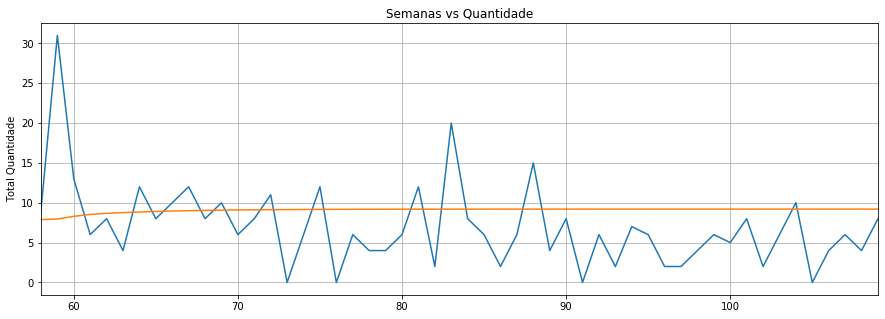

In [1248]:
plt.title('Semanas vs Quantidade')
plt.ylabel('Total Quantidade')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(df1['Quantidade'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()

[4.70002855]


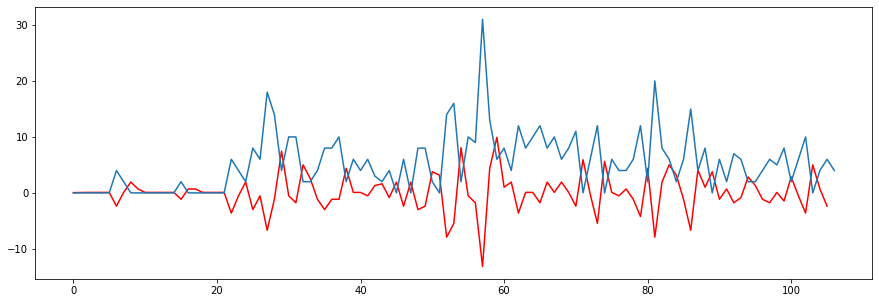

In [1074]:
data = pd.read_csv('4-VendasTelepWeek-Rev3.csv', delimiter = ',')
df = data.loc[data['Codigo'] == 2]
df1 = df.T.reset_index()
df1.columns = ["Semana","Quantidade"]
df1 = df1[1:][1:108]
df1 = df1['Quantidade'].values.astype(float)
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
data = df1
# fit model
model = ARIMA(data, order=(2, 1, 0))
model_fit = model.fit(disp=1)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)


#ts_diff = data - data.shift()



plt.plot(model_fit.fittedvalues, color='red')
plt.plot(data)
plt.plot(yhat)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Text(0.5, 1.0, 'RSS: 2725.0998')

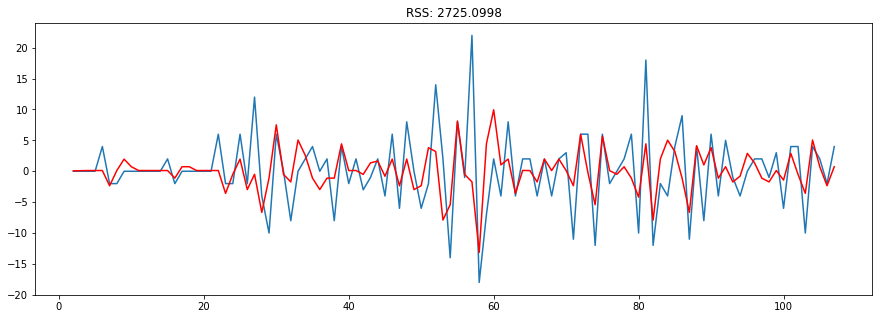

In [1259]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))